# Proyecto práctico: árbol de decisión y random forest con scikit-learn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Matriz de Confusión (Random Forest):
 [[151   0]
 [  0  80]]
Reporte de Clasificación (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00    

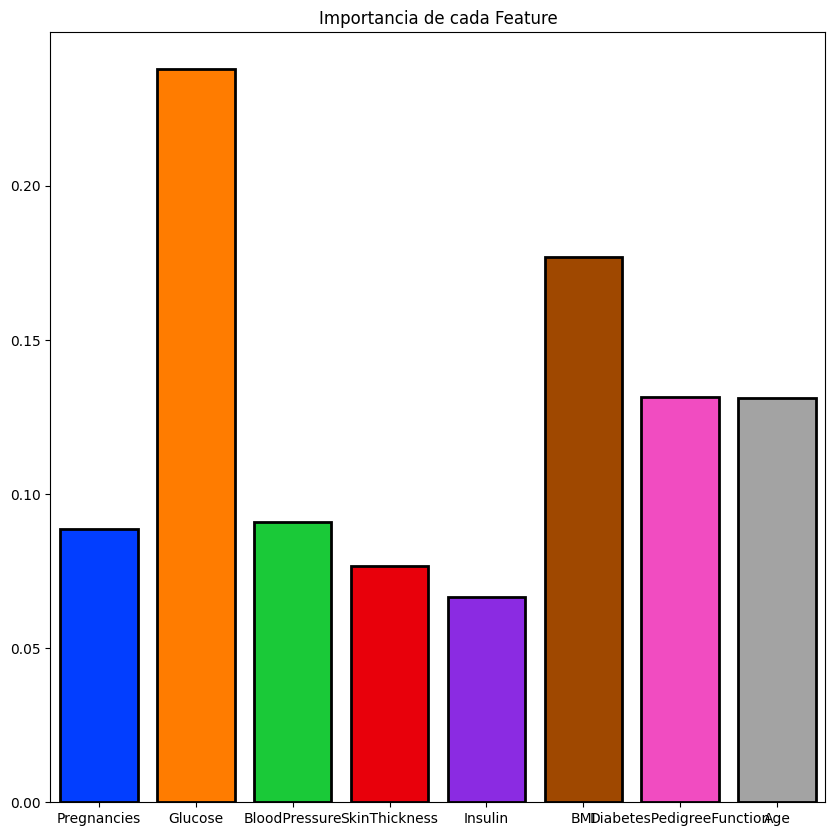

In [2]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Cargamos el dataset
url = './diabetes.csv'
df_diabetes = pd.read_csv(url, sep=',')

# Visualizamos las primeras filas del dataset
df_diabetes.head()

# Visualización aleatoria de 4 filas del dataset
df_diabetes.sample(4, random_state=10)

# Analizamos la forma del dataset
df_diabetes.shape

# Visualizamos los tipos de datos y la cantidad de valores no nulos
df_diabetes.info()

# Verificamos valores faltantes
df_diabetes.isnull().sum()

# Separamos el dataset en características (X) y la variable objetivo (y)
X = df_diabetes.drop('Outcome', axis='columns')
y = df_diabetes['Outcome']

# Dividimos el dataset en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Importamos y creamos un modelo de árbol de decisión
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

# Entrenamos el modelo de árbol de decisión
tree.fit(X_train, y_train)

# Calculamos las predicciones en los conjuntos de entrenamiento y prueba
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

# Calculamos la precisión en el conjunto de entrenamiento
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

# Creamos una instancia del clasificador Random Forest
rf = RandomForestClassifier()

# Definimos un diccionario de parámetros a explorar
parametros = {
  'n_estimators': range(10, 101, 10),  # Prueba valores de 10 a 100 en incrementos de 10 para el número de árboles
  'criterion': ['gini', 'entropy'],  # Prueba ambos criterios de división
  'max_depth': range(2, 21, 2)  # Prueba profundidades de árbol de 2 a 20 en incrementos de 2
}

# Creamos una instancia de GridSearchCV para búsqueda de hiperparámetros
rf_grid = GridSearchCV(rf, parametros, cv=5, scoring='accuracy').fit(X, y)

# Calculamos las predicciones del modelo Random Forest en el conjunto de prueba
y_test_pred_rf = rf_grid.predict(X_test)

# Calculamos la precisión del modelo Random Forest en el conjunto de prueba
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Calculamos la matriz de confusión del modelo Random Forest
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

# Imprimimos la matriz de confusión
print('Matriz de Confusión (Random Forest):\n', cm_rf)

# Calculamos el reporte de clasificación del modelo Random Forest
report_rf = classification_report(y_test, y_test_pred_rf)

# Imprimimos el reporte de clasificación
print('Reporte de Clasificación (Random Forest):\n', report_rf)

# Verificamos el feature importances
importances = rf_grid.best_estimator_.feature_importances_
columns = X.columns
plt.figure(figsize=(10, 10))
sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()
